# Practice Session 01+02: Data preparation

Data scientists [spend a big chunk of their time preparing data](https://blog.ldodds.com/2020/01/31/do-data-scientists-spend-80-of-their-time-cleaning-data-turns-out-no/) and this is one of the first steps in any data mining project. This step is normally called **data preparation**.

The processes of getting an initial understanding of a dataset and preparing it usually go hand-in-hand, and it is critical to perform them well to obtain valid results later. Plus, you can save time and effort by learning how to do proper data preparation.

In this session, we will assume you just received a new dataset and need to do some initial steps with it:

1) Exploratory Data Analysis

* Calculate basis statistics as mean, median, variance, maximum and minimum
* Look at distributions, identify outliers
* Calculate correlations between variables

2) Feature engineering:

* Deal with missing values
* Standardize all numerical columns
* Convert categorical columns to dummy binary variables
* Date and period management
* Feature generation

*Tip*: This process has several steps. It is tempting to maintain a single variable throughout the entire cleaning process, and do something like `x = x.step1()` then `x = x.step2()`. This will create problems for you because if you go back and re-execute a cell it might fail to operate on already transformed data. A better approach in cases like this where you do not have memory problems, is to do `x1 = x.step1()`, `x2 = x1.step2()` and so on, i.e., create a new variable after each transformation or set of transformations.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Mario Muñoz Serrano</font>

E-mail: <font color="blue">mario.munoz01@estudiant.upf.edu</font>

Date: <font color="blue">29/09/2022</font>

# 0. The dataset

The dataset, contained in `device_db.csv` is a 10000 registers of mobile device purchases around 2019. **Each record in the dataset describes a customer that buys a new mobile telephone**. The attributes are defined as follows:
 
0. PURCHASED_DEVICE: the mobile phone bought by the customer
1. DEVICE_VALUE: the cost of the mobile phone bought by the customer
2. LAST_DEVICE_DATE: the date of the previous mobile device purchase
3. DATA\_TRAFFIC\_MONTH_(1..6): The Mbps of data traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
4. VOICE\_TRAFFIC\_MONTH_(1..6): The minutes of voice traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
5. BILLING\_MONTH\_(1..6): Billing (USD) in the month (-1...-6) paid by the customer previous to the mobile device purchase
6. DEVICE\_COST\_MONTH_(1..6): Monthly cost (USD) associated to the mobile device finance in the month (-1...-6) paid by the customer previous to the mobile device purchase: proportion of owner-occupied units built prior to 1940
7. LINE\_ACTIVATION\_DATE: Date of the activation of the mobile line by the customer
8. MONTHS\_LAST\_DEVICE: Number of months of the previous mobile device
9. DURATION\_LINE: Number of months since the customer contracted the mobile line
10. PREVIOUS\_DEVICE\_MODEL: Model of the previous mobile phone
11. PREVIOUS\_DEVICE\_MANUF: Manufacturer of the previous mobile phone
12. PREVIOUS\_DEVICE\_BRAND: Brand of the previous mobile phone

This dataset will be used in next practices as recommendation engines.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Exploratory data analysis 

Exploratory Data Analysis (EDA) allows to us to have an understanding of the dataset from a stadistics perspective, i.e., data distribution and correlation between variables. This is crucial to select the most relevant variables for some purpose.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [2351]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier


We open the csv file contaning the data using separator ";" and assign to a dataframe variable (use `read_csv` from the Pandas library).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [2352]:
# IMPORT DATASETS FROM DRIVE

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2353]:
%cd "/content/drive/MyDrive/Data Mining/data"
%ls

/content/drive/MyDrive/Data Mining/data
device_db.csv


In [2354]:
# LEAVE AS-IS
input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [2355]:
# create_df_info(df): performs the same than df.info() but creating info as a dataframe
def create_df_info(df):
  # get data types of each df column
  info = pd.DataFrame(df.dtypes)
  info['columns'] = info.index
  info = info.reset_index(drop=True)
  info.columns = ['Dtype', 'column']

  # get  non null count per column
  null_count = pd.DataFrame(df.count())
  null_count['column'] = null_count.index
  null_count = null_count.reset_index(drop=True)
  null_count.columns = ['Non-Null Count', 'column']

  # merge both dataframes non null count and data types
  info = null_count.merge(info, on='column', how='left')
  info = info[['column', 'Non-Null Count', 'Dtype']]

  return info

In [2356]:
#Print Input Dataset Info
print('INPUT DATASET COLUMNS:\n')
info = create_df_info(input_dataset)

print(info['column'])
print('\nFIRST THREE ROWS OF INPUT DATASET:\n')
input_dataset.head(3)

INPUT DATASET COLUMNS:

0          PURCHASED_DEVICE
1              DEVICE_VALUE
2        LAST_DEVICE_CHANGE
3      DATA_TRAFFIC_MONTH_1
4      DATA_TRAFFIC_MONTH_2
5      DATA_TRAFFIC_MONTH_3
6      DATA_TRAFFIC_MONTH_4
7      DATA_TRAFFIC_MONTH_5
8      DATA_TRAFFIC_MONTH_6
9     VOICE_TRAFFIC_MONTH_1
10    VOICE_TRAFFIC_MONTH_2
11    VOICE_TRAFFIC_MONTH_3
12    VOICE_TRAFFIC_MONTH_4
13    VOICE_TRAFFIC_MONTH_5
14    VOICE_TRAFFIC_MONTH_6
15          BILLING_MONTH_1
16          BILLING_MONTH_2
17          BILLING_MONTH_3
18          BILLING_MONTH_4
19          BILLING_MONTH_5
20          BILLING_MONTH_6
21      DEVICE_COST_MONTH_1
22      DEVICE_COST_MONTH_2
23      DEVICE_COST_MONTH_3
24      DEVICE_COST_MONTH_4
25      DEVICE_COST_MONTH_5
26      DEVICE_COST_MONTH_6
27     LINE_ACTIVATION_DATE
28       MONTHS_LAST_DEVICE
29            DURATION_LINE
30    PREVIOUS_DEVICE_MODEL
31    PREVIOUS_DEVICE_MANUF
32    PREVIOUS_DEVICE_BRAND
Name: column, dtype: object

FIRST THREE ROWS OF INP

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.5,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.7,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.1,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola


In [2357]:
column_type_df = info.drop('Non-Null Count', axis=1)
display(column_type_df)

,column,Dtype
0,PURCHASED_DEVICE,object
1,DEVICE_VALUE,float64
2,LAST_DEVICE_CHANGE,float64
3,DATA_TRAFFIC_MONTH_1,float64
4,DATA_TRAFFIC_MONTH_2,float64
5,DATA_TRAFFIC_MONTH_3,float64
6,DATA_TRAFFIC_MONTH_4,float64
7,DATA_TRAFFIC_MONTH_5,float64
8,DATA_TRAFFIC_MONTH_6,float64
9,VOICE_TRAFFIC_MONTH_1,float64


To obtain a series from a dataframe you can reference an attribute by name, e.g., `input_dataset.DEVICE_VALUE` returns the series of all device values.

On a series, you can use functions from [numpy](https://numpy.org/doc/) such as `np.mean`, `np.nanmedian` (median ignoring the NaN), `np.std`, `np.min` and `np.max`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [2358]:
def compute_stat_manually(series):
  stats_var = {'mean': 0,
                '50%':  0,
                'min':  0,
                'max':  0}
 
  stats_var['mean'] = np.mean(series)
  stats_var['50%']  = np.nanmedian(series)
  stats_var['min']  = np.min(series)
  stats_var['max']  = np.max(series)

  
  return pd.Series(stats_var)



def compute_stats(dataset, mode):
  dataset = dataset.select_dtypes(['number'])
  stats = pd.DataFrame()

  for var in list(dataset.columns):
    if mode == 'manually':
      stats[var] = compute_stat_manually(dataset[var])
    else:
      stats[var] = dataset[var].describe()
      
  return stats




<font size="+1" color="red">Replace this cell with code to create a dataframe named `stats_df` containing one row per each column of type ``float64`` in the input data, with the name of the column and its mean, median, maximum and minimum.</font>

In [2359]:
stats_describe_df = compute_stats(input_dataset, None)
stats_df = compute_stats(input_dataset, 'manually')
display(stats_df)

,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,...,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE
mean,750.484211,2.016698e+07,3481.825663,3649.957795,3653.426959,3269.440625,3673.368341,3427.689578,154.852210,142.567877,...,102.26839,10.807785,10.587317,11.71326,11.554371,12.510864,12.979012,2.013605e+07,25.338323,62.368341
50%,393.000000,2.017060e+07,1208.728050,1294.950800,1310.674800,1176.539300,1287.094000,1277.116300,84.049999,74.900002,...,94.99000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.015032e+07,22.000000,48.000000
min,15.000000,2.012100e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.992080e+07,-5.000000,0.000000
max,9057.000000,2.019050e+07,127017.590000,111948.840000,111948.840000,87856.414000,121834.810000,90550.609000,4220.100100,3132.100100,...,1187.30000,6440.000000,1360.000000,2466.00000,455.000000,1258.000000,1000.000000,2.019042e+07,78.000000,320.000000


<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [2360]:
for var in list(stats_describe_df.columns):
  print(var)
  print(stats_describe_df[var])
  print('\n')

DEVICE_VALUE
count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64


LAST_DEVICE_CHANGE
count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64


DATA_TRAFFIC_MONTH_1
count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dtype: float64


DATA_TRAFFIC_MONTH_2
count      8841.000000
mean       3649.957795
std        6444.357603
min           0.000000
25%          46.542538
50%        1294.950800
75%        4546.064900
max      111948.840000
Name: DATA_TRAFFIC_MONTH_2, dtype: float64


DATA_TRAFFIC_MONTH_3
count      8846.000000


<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **BILLING_MONTH_1** (bill in the first month) with the ones from the **.describe()** function.</font>

<font size="+1" color="red">There are at least two differences, indicate them.</font>

In [2361]:
print('STATS COMPUTED USING DESCRIBE')
print(stats_describe_df['BILLING_MONTH_1'], end='\n\n')
print('STATS COMPUTED MANUALLY')
print(stats_df['BILLING_MONTH_1'])

STATS COMPUTED USING DESCRIBE
count    9999.000000
mean      102.344564
std        67.787155
min      -128.010000
25%        66.000000
50%        94.990000
75%       121.470000
max      1569.100000
Name: BILLING_MONTH_1, dtype: float64

STATS COMPUTED MANUALLY
mean     102.344564
50%       94.990000
min     -128.010000
max     1569.100000
Name: BILLING_MONTH_1, dtype: float64


## 1.2. Inventory of device models

In exploratory data analysis, it is very useful to do an **inventory** or **census** of the possible values of a variable. For us, a census will be a frequency table in which you show the possible values of a variable, and their frequency, in decreasing order of frequency.



<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [2362]:
consensus_prev_dev_model = input_dataset['PREVIOUS_DEVICE_MODEL'].value_counts()
consensus_prev_dev_brand = input_dataset['PREVIOUS_DEVICE_BRAND'].value_counts()

In [2363]:
display(consensus_prev_dev_model)

iPhone 7                   425
iPhone 6                   250
Samsung Galaxy J5          243
iPhone 6S                  212
Samsung Galaxy J1 Mini     204
                          ... 
LG Optimus L3 II             1
Lenovo S930,Lenovo S939      1
Samsung Corby II             1
SGH-U600                     1
Nokia 1100                   1
Name: PREVIOUS_DEVICE_MODEL, Length: 580, dtype: int64

In [2364]:
display(consensus_prev_dev_brand)

Samsung     1877
Outros      1592
Apple       1548
Motorola     638
LG           514
Name: PREVIOUS_DEVICE_BRAND, dtype: int64

<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

The most common device model and the most common device brand do not match, because samsung has more common models than apple.

# 2. Feature engineering

Feature engineering is the process of extracting valuable features from the data. This requires pre-processing, combining, normalizing, and performing other operations on the values of some features.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Missing values management

**Not A Number** (NaN) is a generic term to refer to *something that should be a number, but is not*. Usually, the value is either missing completely ("null") or contains the wrong type of object, such as a string or a concept such as infinity.

To find which columns contain NaN values, you can use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function, as explained, e.g., [here](https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab). 

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to print which columns contain at least one NaN value, and how many NaN values are in that column. You should create a dataframe `nan_counter` and diaplay it.</font>

In [2365]:
nan_counter = info
nan_counter['Null count'] = len(input_dataset.index) - nan_counter['Non-Null Count']
nan_counter = info.drop(['Dtype', 'Non-Null Count'], axis=1)
display(nan_counter)

,column,Null count
0,PURCHASED_DEVICE,147
1,DEVICE_VALUE,310
2,LAST_DEVICE_CHANGE,2318
3,DATA_TRAFFIC_MONTH_1,1132
4,DATA_TRAFFIC_MONTH_2,1159
5,DATA_TRAFFIC_MONTH_3,1154
6,DATA_TRAFFIC_MONTH_4,1183
7,DATA_TRAFFIC_MONTH_5,1134
8,DATA_TRAFFIC_MONTH_6,1465
9,VOICE_TRAFFIC_MONTH_1,1132


The way **NaNs** are managed varies according to the meaning of each variable. In some occasions, registers should be removed, filled with other columns or calculated (imputed).

* To delete rows containing a null value, we can use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* To replace null values, we can use [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Please note that these steps should be applied sequentially, i.e., the output of one step should be fed into the next step. You can do, for instance: `df02 = df01.operation(...)` followed by `df03 = df02.operation(...)` and so on.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, **PREVIOUS\_DEVICE\_MODEL**, or **PREVIOUS\_DEVICE\_BRAND**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [2366]:
clean_dataset1 = input_dataset.dropna(axis=0, subset=['PURCHASED_DEVICE', 'DEVICE_VALUE', 'PREVIOUS_DEVICE_MODEL', 'PREVIOUS_DEVICE_BRAND'])

In [2367]:
def clean_dataset_step2(dataset):
  variables = ['DATA_TRAFFIC_MONTH_', 'VOICE_TRAFFIC_MONTH_', 'BILLING_MONTH_', 'DEVICE_COST_MONTH_']

  for var in variables:
    for i in range(1,7):
      dataset[f'{var}{i}'].fillna(0, inplace=True)

  return dataset

<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [2368]:
clean_dataset2 = clean_dataset1
clean_dataset2 = clean_dataset_step2(clean_dataset2)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [2369]:
clean_dataset3 = clean_dataset2
clean_dataset3['LINE_ACTIVATION_DATE'].fillna(clean_dataset3['LAST_DEVICE_CHANGE'], inplace=True)


<font size="+1" color="red">Replace this cell with code to print the header and the first five rows after this processing</font>

In [2370]:
#Print Clean Dataset 3 Info
print('CLEAN DATASET COLUMNS:\n')
info3 = create_df_info(clean_dataset3)

print(info3['column'])
print('\nFIRST FIVE ROWS OF CLEAN DATASET:\n')
display(clean_dataset3.head(5))

CLEAN DATASET COLUMNS:

0          PURCHASED_DEVICE
1              DEVICE_VALUE
2        LAST_DEVICE_CHANGE
3      DATA_TRAFFIC_MONTH_1
4      DATA_TRAFFIC_MONTH_2
5      DATA_TRAFFIC_MONTH_3
6      DATA_TRAFFIC_MONTH_4
7      DATA_TRAFFIC_MONTH_5
8      DATA_TRAFFIC_MONTH_6
9     VOICE_TRAFFIC_MONTH_1
10    VOICE_TRAFFIC_MONTH_2
11    VOICE_TRAFFIC_MONTH_3
12    VOICE_TRAFFIC_MONTH_4
13    VOICE_TRAFFIC_MONTH_5
14    VOICE_TRAFFIC_MONTH_6
15          BILLING_MONTH_1
16          BILLING_MONTH_2
17          BILLING_MONTH_3
18          BILLING_MONTH_4
19          BILLING_MONTH_5
20          BILLING_MONTH_6
21      DEVICE_COST_MONTH_1
22      DEVICE_COST_MONTH_2
23      DEVICE_COST_MONTH_3
24      DEVICE_COST_MONTH_4
25      DEVICE_COST_MONTH_5
26      DEVICE_COST_MONTH_6
27     LINE_ACTIVATION_DATE
28       MONTHS_LAST_DEVICE
29            DURATION_LINE
30    PREVIOUS_DEVICE_MODEL
31    PREVIOUS_DEVICE_MANUF
32    PREVIOUS_DEVICE_BRAND
Name: column, dtype: object

FIRST FIVE ROWS OF CLEA

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


If `df` is a dataframe, `df.shape` contains a tuple with the number of rows and the number of columns of the data frame. You should now print something like this:

```
Rows in the original dataset: M
Rows in the new dataset: N ((100*(M-N)/M)% less)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped.</font>

In [2371]:
M = len(input_dataset.index)
N = len(clean_dataset3.index)
print(f'Rows in the original dataset: {M}')
print(f'Rows in the new dataset: {N} ({(100*(M-N)/M)}% less)')

Rows in the original dataset: 10000
Rows in the new dataset: 5988 (40.12% less)


## 2.2. Distributions, outliers, and correlations

We will now plot the distributions of some variables and apply some transformations.

* You can use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram.
* You can use [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with `kind='box'` to create a boxplot.
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram of **DEVICE\_VALUE**, **VOICE\_TRAFFIC\_MONTH\_1-3** (include a legend, each month should be a different color),  **BILLING\_MONTH\_3**, **DURATION\_LINE**. Remember to include labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

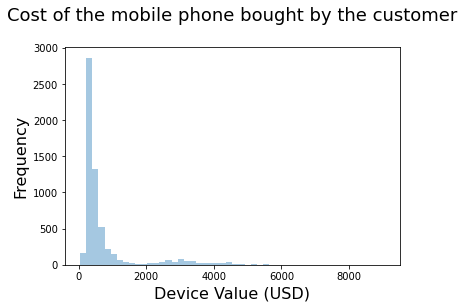

In [2372]:
sns.distplot(clean_dataset3['DEVICE_VALUE'], kde=False)
plt.title('Cost of the mobile phone bought by the customer\n', fontsize=18)
plt.xlabel('Device Value (USD)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

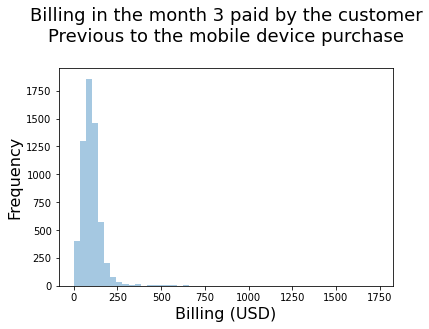

In [2373]:
sns.distplot(clean_dataset3['BILLING_MONTH_3'], kde=False)
plt.title('Billing in the month 3 paid by the customer\nPrevious to the mobile device purchase\n', fontsize=18)
plt.xlabel('Billing (USD)', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

Text(0, 0.5, 'Frequency')

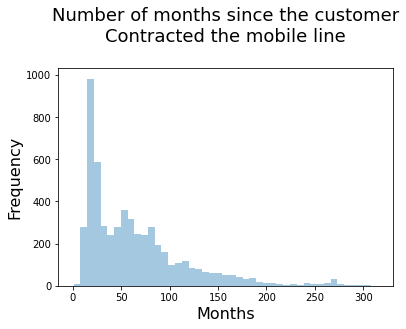

In [2374]:
sns.distplot(clean_dataset3['DURATION_LINE'], kde=False)
plt.title('Number of months since the customer\nContracted the mobile line\n', fontsize=18)
plt.xlabel('Months', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

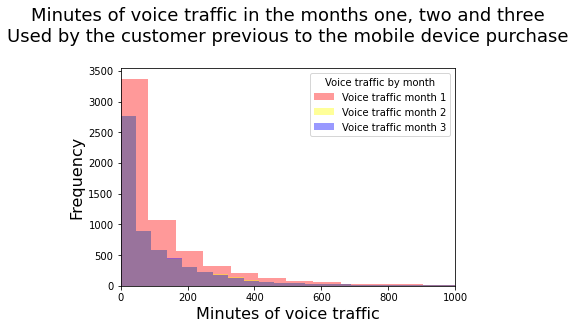

In [2375]:
sns.distplot(clean_dataset3['VOICE_TRAFFIC_MONTH_1'], kde=False, color = 'red')
sns.distplot(clean_dataset3['VOICE_TRAFFIC_MONTH_2'], kde=False, color = 'yellow')
sns.distplot(clean_dataset3['VOICE_TRAFFIC_MONTH_3'], kde=False, color = 'blue')
plt.title('Minutes of voice traffic in the months one, two and three\nUsed by the customer previous to the mobile device purchase\n', fontsize=18)
plt.legend(labels=["Voice traffic month 1","Voice traffic month 2", "Voice traffic month 3"], title = "Voice traffic by month")
plt.xlabel('Minutes of voice traffic', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(0, 1000)
plt.show()

Variables having exponential distribution can be processed and visualized better after transforming them, usually by applying the `log(x+1)` function (we want to avoid zeros, hence the +1).
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_1** and plot its new distribution.</font>

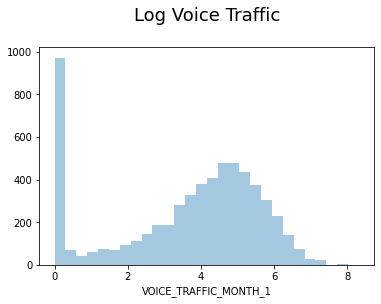

In [2376]:
new_dis = np.log(clean_dataset3['VOICE_TRAFFIC_MONTH_1'] +1)
sns.distplot(new_dis, kde=False)
plt.title('Log Voice Traffic\n', fontsize=18)
plt.show()

<font size="+1" color="red">Replace this cell with code to create a boxplot for variables **DATA\_TRAFFIC\_MONTH\_1**, **VOICE\_TRAFFIC\_MONTH\_1** and **BILLING\_MONTH\_1**</font>

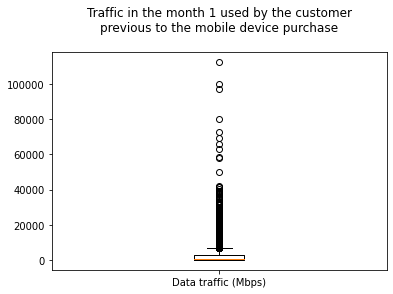

In [2377]:
data = clean_dataset3['DATA_TRAFFIC_MONTH_1']
fig1, ax1 = pyplot.subplots()
ax1.set_title('Traffic in the month 1 used by the customer\nprevious to the mobile device purchase\n')
ax1.boxplot(data, labels = ['Data traffic (Mbps)'])
pyplot.show()

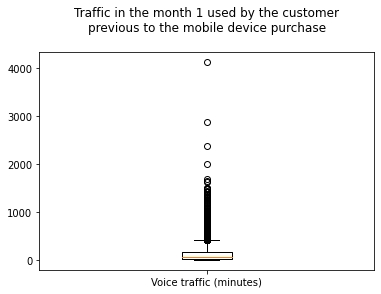

In [2378]:
data = clean_dataset3['VOICE_TRAFFIC_MONTH_1']
fig1, ax1 = pyplot.subplots()
ax1.set_title('Traffic in the month 1 used by the customer\nprevious to the mobile device purchase\n')
ax1.boxplot(data, labels = ['Voice traffic (minutes)'])
pyplot.show()

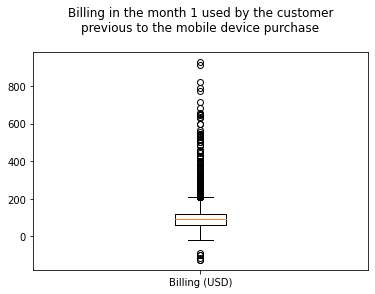

In [2379]:
data = clean_dataset3['BILLING_MONTH_1']
fig1, ax1 = pyplot.subplots()
ax1.set_title('Billing in the month 1 used by the customer\nprevious to the mobile device purchase\n')
ax1.boxplot(data, labels = ['Billing (USD)'])
pyplot.show()

<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

In this dataset, there are many dependencies between different attributes, e.g., a large voice traffic will probably be associated with a large data traffic, a more expensive bill, and possibly a more expensive device (`DEVICE_VALUE`).

You can use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

In [2380]:
data = [f'DATA_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
voice = [f'VOICE_TRAFFIC_MONTH_{i}' for i in range(1, 7)]
billing = [f'BILLING_MONTH_{i}' for i in range(1, 7)]
device = [f'DEVICE_COST_MONTH_{i}' for i in range(1, 7)]
others = ['DURATION_LINE', 'DEVICE_VALUE']

interesting_var = data + voice + billing + device + others

correlation_matrix = clean_dataset3[interesting_var]

correlation_matrix = correlation_matrix.corr(method='pearson')

display(correlation_matrix)

,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,VOICE_TRAFFIC_MONTH_2,VOICE_TRAFFIC_MONTH_3,VOICE_TRAFFIC_MONTH_4,...,BILLING_MONTH_5,BILLING_MONTH_6,DEVICE_COST_MONTH_1,DEVICE_COST_MONTH_2,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,DURATION_LINE,DEVICE_VALUE
DATA_TRAFFIC_MONTH_1,1.000000,0.756333,0.731075,0.701346,0.661925,0.623487,0.091497,0.071170,0.072724,0.067697,...,0.187757,0.192214,0.013154,0.053023,0.082138,0.078769,0.081845,0.082754,-0.010386,0.116561
DATA_TRAFFIC_MONTH_2,0.756333,1.000000,0.974986,0.790132,0.760661,0.689210,0.080655,0.082591,0.083516,0.073245,...,0.189966,0.197687,0.012789,0.048059,0.063214,0.068586,0.069624,0.072095,0.005628,0.113921
DATA_TRAFFIC_MONTH_3,0.731075,0.974986,1.000000,0.814513,0.771017,0.696484,0.082316,0.084456,0.084809,0.074231,...,0.194440,0.204056,0.013616,0.050280,0.064950,0.069882,0.070833,0.073042,0.005655,0.115521
DATA_TRAFFIC_MONTH_4,0.701346,0.790132,0.814513,1.000000,0.826757,0.721067,0.086213,0.087458,0.087728,0.090379,...,0.207142,0.219507,0.012147,0.048129,0.067395,0.065312,0.068391,0.071571,-0.016521,0.118570
DATA_TRAFFIC_MONTH_5,0.661925,0.760661,0.771017,0.826757,1.000000,0.803762,0.089065,0.093805,0.095652,0.091987,...,0.206180,0.223316,0.007332,0.034486,0.072542,0.056567,0.058195,0.061078,0.003801,0.126396
DATA_TRAFFIC_MONTH_6,0.623487,0.689210,0.696484,0.721067,0.803762,1.000000,0.079204,0.076069,0.077673,0.077759,...,0.190584,0.200456,0.014574,0.050862,0.090871,0.071097,0.074176,0.079120,0.001765,0.118783
VOICE_TRAFFIC_MONTH_1,0.091497,0.080655,0.082316,0.086213,0.089065,0.079204,1.000000,0.815295,0.799665,0.737093,...,0.128770,0.136608,-0.008698,0.000574,0.009114,0.003552,0.006573,0.011290,0.017118,0.023954
VOICE_TRAFFIC_MONTH_2,0.071170,0.082591,0.084456,0.087458,0.093805,0.076069,0.815295,1.000000,0.982587,0.834420,...,0.112065,0.118259,-0.006293,0.004728,-0.003244,0.001499,0.001619,0.003926,0.028017,0.027272
VOICE_TRAFFIC_MONTH_3,0.072724,0.083516,0.084809,0.087728,0.095652,0.077673,0.799665,0.982587,1.000000,0.847852,...,0.113864,0.117191,-0.005919,0.005817,-0.002401,0.002626,0.002678,0.005525,0.029267,0.027570
VOICE_TRAFFIC_MONTH_4,0.067697,0.073245,0.074231,0.090379,0.091987,0.077759,0.737093,0.834420,0.847852,1.000000,...,0.121765,0.115676,-0.006851,0.005032,0.005440,-0.003068,-0.001478,0.005517,0.020981,0.023935


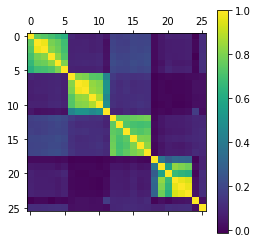

In [2381]:
plt.matshow(correlation_matrix)
plt.colorbar()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

## 2.3. Date management and period calculation

First, we will determine the date of the `LAST_DEVICE_CHANGE` of the last device that was changed in the entire dataset (i.e., the maximum value of the `LAST_DEVICE_CHANGE` column, plus 30 days). We will refer to that date as `latest_change`.

Note that `LAST_DEVICE_CHANGE` is expressed as a floating point number in the format `YYYYMMDD.0`, for instance 3 of July of 2018 would be `20180703.0`. Convert to integer first, then to string.

As a string, this is formatted according to [strptime](https://www.geeksforgeeks.org/python-datetime-strptime-function/) conventions with format `%Y%m%d`.

Use [datetime.datetime.strptime](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime) to convert to create object `latest_change` and print it.

Next, add 30 days to that date to obtain object `now` (we will assume we are doing this processing 30 days after the latest device change). Use a `datetime.timedelta` object for that.

Your output should look like this:

```
2019-05-01 00:00:00
2019-05-31 00:00:00
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [2382]:
latest_change = clean_dataset3['LAST_DEVICE_CHANGE'].max()
latest_change = datetime.datetime.strptime(str(int(latest_change)), '%Y%m%d')
now = latest_change + datetime.timedelta(days=30)
print(latest_change)
print(now)



2019-05-01 00:00:00
2019-05-31 00:00:00


Now, obtain the series corresponding to the last device change, you can do it by using [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) as if you were using `strptime`:

```
series_converted = pd.to_datetime(dataframe[column_name], format='%Y%m%d')
```

Now compute the difference between the now and the series_converted. 

Divide that difference by `30 * datetime.timedelta(days=1)` to obtain the difference in periods of 30 days (approximately one month).

Replace the `MONTHS_LAST_DEVICE` column with those differences. You may need to [fill the NaN with zeroes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), and [convert to type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) `int`.


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [2383]:
clean_dataset4 = clean_dataset3.reset_index(drop=True)
prev = clean_dataset4['LAST_DEVICE_CHANGE']
clean_dataset4['LAST_DEVICE_CHANGE'] = clean_dataset4['LAST_DEVICE_CHANGE'].fillna(0).astype(int)
clean_dataset4['LAST_DEVICE_CHANGE'] = clean_dataset4['LAST_DEVICE_CHANGE'].astype(str)

series_converted = pd.to_datetime(clean_dataset4['LAST_DEVICE_CHANGE'], format='%Y%m%d', errors='coerce')

In [2384]:
for i in range(len(series_converted)):
  if not pd.isnull(series_converted[i]):
    date = series_converted[i].to_pydatetime()
    difference = (now - date)

    months_diff = difference.total_seconds()/ (30*24*60*60)
    clean_dataset4['MONTHS_LAST_DEVICE'].iloc[i] = months_diff
    
  else:
    clean_dataset4['MONTHS_LAST_DEVICE'].iloc[i] = np.nan

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable.
    
Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [2385]:
series = clean_dataset4['LINE_ACTIVATION_DATE'].fillna(0).astype(int)
series = series .astype(str)
series = pd.to_datetime(series, format='%Y%m%d', errors='coerce')

for i in range(len(clean_dataset4.index)):
  date = series.iloc[i].to_pydatetime()
  clean_dataset4['DURATION_LINE']  = (now - date)

In [2386]:
average_duration_line = clean_dataset4['DURATION_LINE'].mean()
average_duration_line = average_duration_line.total_seconds()/ (365*24*60*60)
print(f'Average duration line: {round(average_duration_line, 2)} years')

Average duration line: 8.3 years



## 2.4. Standarization and scaling of numerical variables

Scaling a series involves changing the values. Standardization involves ensuring that the mean is 0 and the standard deviation is 1, while min-max scaling requires that the maximum is 1, the minimum is 0, and all remaining values are linearly interpolated.

You can use [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standarize a variable, and [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to perform min-max scaling.

The following example shows how to use these:

```python
test_data = [{'x': -1.0}, {'x': 2.0}, {'x': 3.0}, {'x': 6.0}]
test_df = pd.DataFrame(test_data)
display(test_df)

test_df['x_standardized'] = StandardScaler().fit_transform(test_df[['x']])
test_df['x_minmaxscaled'] = MinMaxScaler().fit_transform(test_df[['x']])
display(test_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STAND** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



DATA_TRAFFIC_MONTH_1 STANDARIZED AND SCALED HISTOGRAMS



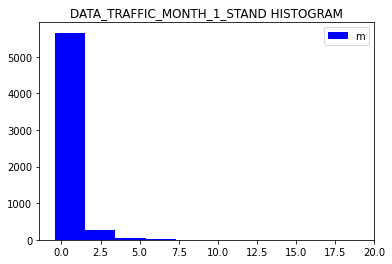

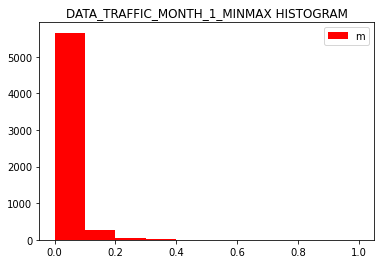

--------------------------------------------------


VOICE_TRAFFIC_MONTH_1 STANDARIZED AND SCALED HISTOGRAMS



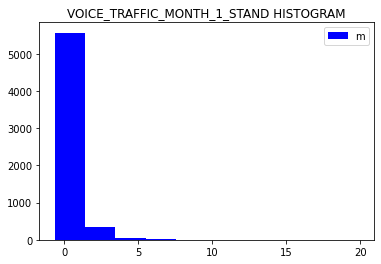

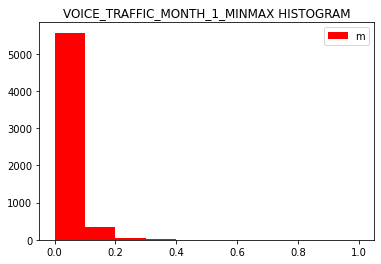

--------------------------------------------------


BILLING_MONTH_1 STANDARIZED AND SCALED HISTOGRAMS



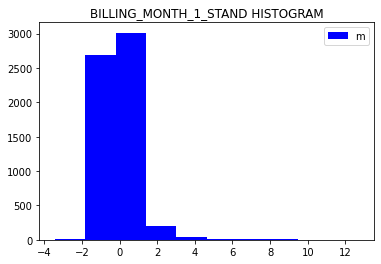

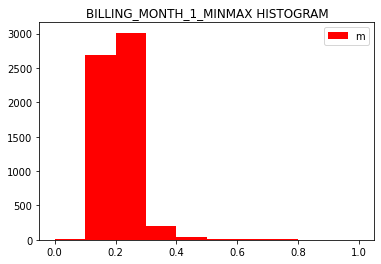

--------------------------------------------------


DEVICE_COST_MONTH_1 STANDARIZED AND SCALED HISTOGRAMS



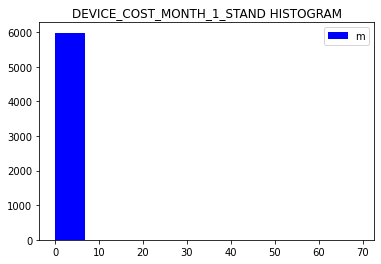

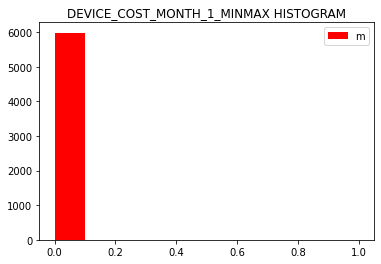

--------------------------------------------------




In [2387]:
clean_dataset5 = clean_dataset4

rescale_cols = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1', 'BILLING_MONTH_1', 'DEVICE_COST_MONTH_1']

for col in rescale_cols:
  stkey = f'{col}_STAND'
  minmaxkey = f'{col}_MINMAX'

  clean_dataset5[stkey]  = StandardScaler().fit_transform(clean_dataset5[[col]])
  clean_dataset5[minmaxkey] = MinMaxScaler().fit_transform(clean_dataset5[[col]])



  print(f'{col} STANDARIZED AND SCALED HISTOGRAMS\n')
  plt.figure()
  plt.hist(clean_dataset5[stkey], color= ['blue'])
  plt.title(stkey + ' HISTOGRAM')
  plt.legend('month 1\n')
  plt.show()
  print('\n')
  plt.figure()
  plt.hist(clean_dataset5[minmaxkey], color= ['red'])
  plt.title(minmaxkey + ' HISTOGRAM')
  plt.legend('month 1\n')
  plt.show()
  print('--------------------------------------------------\n\n')

## 2.5. Convert categorical columns to dummy binary variables

Categorical variables usually need to be transformed into numerical values to apply some machine learning methods.

Use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform a categorical variable to integer values. Example:

```python
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

colors_df['colors_int_encoded'] = LabelEncoder().fit_transform(colors_df['color'])
display(colors_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_MODEL_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_MODEL**.</font>

In [2388]:
clean_dataset6 = clean_dataset5

clean_dataset6['PREVIOUS_DEVICE_MODEL_INT_ENCODED'] = LabelEncoder().fit_transform(clean_dataset6['PREVIOUS_DEVICE_MODEL'])


You can use [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to convert a categorical variable to multiple columns using one-hot encoding. Example:

```
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

color_dummies = pd.get_dummies(colors_df['color'], prefix='color_')
colors_df_with_dummies = colors_df.join(color_dummies)
display(colors_df_with_dummies)
```


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_BRAND** to dummy binary variables.</font>

In [2389]:
device_dummies = pd.get_dummies(clean_dataset6['PREVIOUS_DEVICE_BRAND'], prefix='PREVIOUS_DEVICE_BRAND_')
clean_dataset6 = clean_dataset6.join(device_dummies)

## 2.6. Feature generation

In the current dataset we have a historic of 6 months for data traffic, voice traffic, billing and device cost. Feature generation consists of creating new attributes from the current dataset that can help us to create, e.g., better predictive models.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

In [2390]:
clean_dataset7 = clean_dataset6
variables = ['DATA_TRAFFIC_', 'VOICE_TRAFFIC_', 'BILLING_', 'DEVICE_COST_']

for var in variables:
  variable_months = [f'{var}MONTH_{month}' for month in range(1,7)]

  clean_dataset7[f'{var}MEAN']  = clean_dataset7[variable_months].mean(axis=1)
  clean_dataset7[f'{var}MAX']   = clean_dataset7[variable_months].max(axis=1)
  clean_dataset7[f'{var}MIN']   = clean_dataset7[variable_months].min(axis=1)
  clean_dataset7[f'{var}RANGE'] = clean_dataset7[f'{var}MAX'] - clean_dataset7[f'{var}MIN']



<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


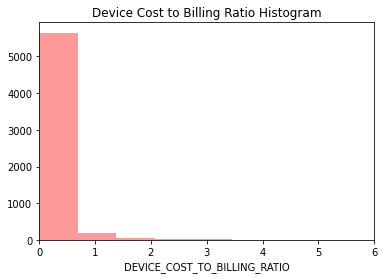

In [2391]:
clean_dataset7['DEVICE_COST_TO_BILLING_RATIO'] = clean_dataset7['DEVICE_COST_MEAN'] / clean_dataset7['BILLING_MEAN']

plt.figure()
plt.xlim(0, 6)
sns.distplot(clean_dataset7['DEVICE_COST_TO_BILLING_RATIO'], kde=False, color = 'red')
plt.title("Device Cost to Billing Ratio Histogram")
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

## 2.7. Text parsing/processing

In machine learning, text processing is a very useful tool that can be used to improve datasets. In some use cases, for instance customer care applications using digital channels as Whatsapp, Facebook, etc..., data scientist teams mainly work with text data.

One of the text processing technique is to extract concrete words or tokens from a sentence or documents. Regular expressions are a great tool to extract data trough these patterns.

In this dataset, note that **PURCHASED_DEVICE** is a variable that is formed by a "**device_code**"+"**_**"+"**manufacture name**"+"**  **"+"**device model**". We want to split this variable into its components.

Tip: use [str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to separate a string into several parts.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

In [2392]:
clean_dataset8 = clean_dataset7

string = clean_dataset8['PURCHASED_DEVICE'].str.split('_')

clean_dataset8['PURCHASED_DEVICE_CODE'] = string.str[0]


others = string.str[1]

others = others.str.split(' ')
clean_dataset8['PURCHASED_DEVICE_MANUFACTURER'] = others.str[0]
clean_dataset8['PURCHASED_DEVICE_MODEL'] = others.str[1]

<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

In [2393]:
table1 = clean_dataset8.value_counts(clean_dataset8['PURCHASED_DEVICE_MANUFACTURER'])
table2 = clean_dataset8.value_counts(clean_dataset8['PREVIOUS_DEVICE_MANUF'])

display(table1)
print('----')
display(table2)

PURCHASED_DEVICE_MANUFACTURER
LG          3556
SAMSUNG     1094
MOTOROLA     630
APPLE        448
ALCATEL      258
ASUS           2
dtype: int64

----


PREVIOUS_DEVICE_MANUF
Samsung Korea                              1879
Apple Inc                                  1495
Motorola Mobility LLC, a Lenovo Company     849
LG Electronics Inc.                         506
TCL Communication Ltd                       279
                                           ... 
Longconn Electronics (Shenzhen) Co Ltd        1
Meizu Technology Co Ltd                       1
Motorola                                      1
Mundo Reader S.L.                             1
u-blox AG                                     1
Length: 67, dtype: int64

## 2.8. Splitting and sampling a dataset

Splitting and sampling dataset are techniques that distribute the original dataset in n-parts. One of the most interesting application of these tools is to separate the dataset to train and test a machine learning model. Meanwhile sampling guarantees same type of data (i.e. distributions), splitting will separate the dataset with the ratio we need. Usually, 80%-20% or 70%-30% splitting ratios are the most common used.

Once again, Sklearn library helps to us to cover this necessity through the function [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which splits a dataset into two parts, which usually will be used for training and testing.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

In [2394]:
train_dt, test_dt = train_test_split(clean_dataset8.iloc[:, :-1], test_size = 0.3)

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

In [2395]:
variables = ['DATA_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_1' , 'BILLING_MONTH_1']

train_stats = compute_stats(train_dt[variables], None)
test_stats = compute_stats(test_dt[variables], None)
print('\n\n----- Train main stats -----\n')
print(train_stats)
print('\n\n----- Test main stats -----\n')
print(test_stats)



----- Train main stats -----

       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count           4191.000000            4191.000000      4191.000000
mean            2553.442583             127.791792       100.398812
std             5802.594332             200.543396        66.169158
min                0.000000               0.000000      -124.490000
25%                0.000000               9.300000        64.985000
50%              397.891690              61.400002        92.990000
75%             2702.853400             165.349995       121.140000
max           112421.170000            4113.000000       926.410000


----- Test main stats -----

       DATA_TRAFFIC_MONTH_1  VOICE_TRAFFIC_MONTH_1  BILLING_MONTH_1
count            1797.00000            1797.000000      1797.000000
mean             2558.26522             136.980133        97.565058
std              5709.31951             199.267850        62.050167
min                 0.00000               0.000000   

# 3. Comparing iPhone and Samsung J series users

Finally, find some features that are different between users of an Apple iPhone and users of a Samsung J series phone (this includes J410G, J610G, J415G, and all other models by Samsung that start with a *J*).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

In [2396]:
mask_iphne = (clean_dataset8['PURCHASED_DEVICE_MODEL'] == 'IPHONE')
iphone_dt = clean_dataset8.loc[mask_iphne]
iphone_dt['target'] = 1

mask_smsung = (clean_dataset8['PURCHASED_DEVICE_MANUFACTURER'] == 'SAMSUNG')
samsung_dt = clean_dataset8.loc[mask_smsung]
samsung_dt['target'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

In [2397]:
final_df = pd.concat([iphone_dt, samsung_dt])
final_df = final_df.reset_index(drop=True)

correl_final = final_df.corr()
correl_final = correl_final.sort_values(by=['target'])
features_target = correl_final['target']

interesting_features = features_target.loc[features_target > 0.18]
display(interesting_features)

DATA_TRAFFIC_MONTH_5                 0.180196
BILLING_MIN                          0.185890
DATA_TRAFFIC_MAX                     0.187686
DATA_TRAFFIC_MONTH_2                 0.198318
DATA_TRAFFIC_MIN                     0.199775
DATA_TRAFFIC_MONTH_3                 0.201714
DATA_TRAFFIC_MEAN                    0.206106
PREVIOUS_DEVICE_MODEL_INT_ENCODED    0.284428
PREVIOUS_DEVICE_BRAND__Apple         0.448729
DEVICE_VALUE                         0.718475
target                               1.000000
Name: target, dtype: float64

DEVICE VALUE IPHONE VS SAMSUNG



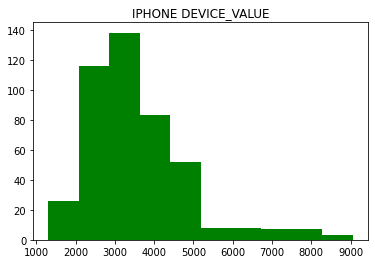

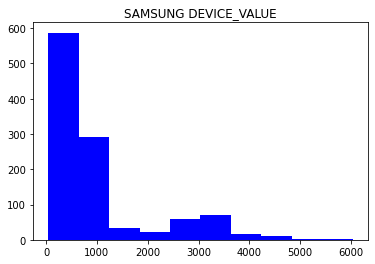

In [2398]:
print('DEVICE VALUE IPHONE VS SAMSUNG\n')
plt.figure()
plt.hist(iphone_dt['DEVICE_VALUE'], color= ['green'])
plt.title('IPHONE DEVICE_VALUE')
plt.show()

print('\n')
plt.figure()
plt.hist(samsung_dt['DEVICE_VALUE'], color= ['blue'])
plt.title('SAMSUNG DEVICE_VALUE')
plt.show()

DATA TRAFFIC MEAN IPHONE VS SAMSUNG



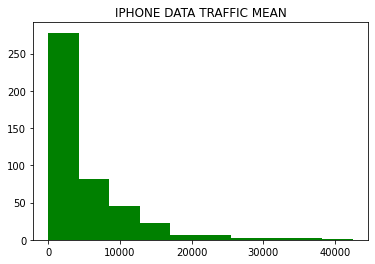

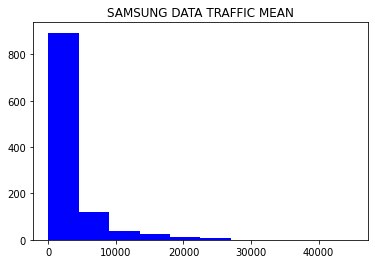

In [2399]:
print('DATA TRAFFIC MEAN IPHONE VS SAMSUNG\n')
plt.figure()
plt.hist(iphone_dt['DATA_TRAFFIC_MEAN'], color= ['green'])
plt.title('IPHONE DATA TRAFFIC MEAN')
plt.show()

print('\n')
plt.figure()
plt.hist(samsung_dt['DATA_TRAFFIC_MEAN'], color= ['blue'])
plt.title('SAMSUNG DATA TRAFFIC MEAN')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/data-mining-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, remember what you learned in machine learning and create a simple [decision tree model](https://scikit-learn.org/stable/modules/tree.html) having as input variables:

1. PREVIOUS\_DEVICE\_MODEL
1. PREVIOUS\_DEVICE\_BRAND
1. MONTHS\_LAST\_DEVICE

And as output variable `PURCHASED_DEVICE_MANUFACTURER`. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.


**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: model purchased device</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>